In [1]:
import torch
from cust_plot import plot
from utils import device

# Visualise training results

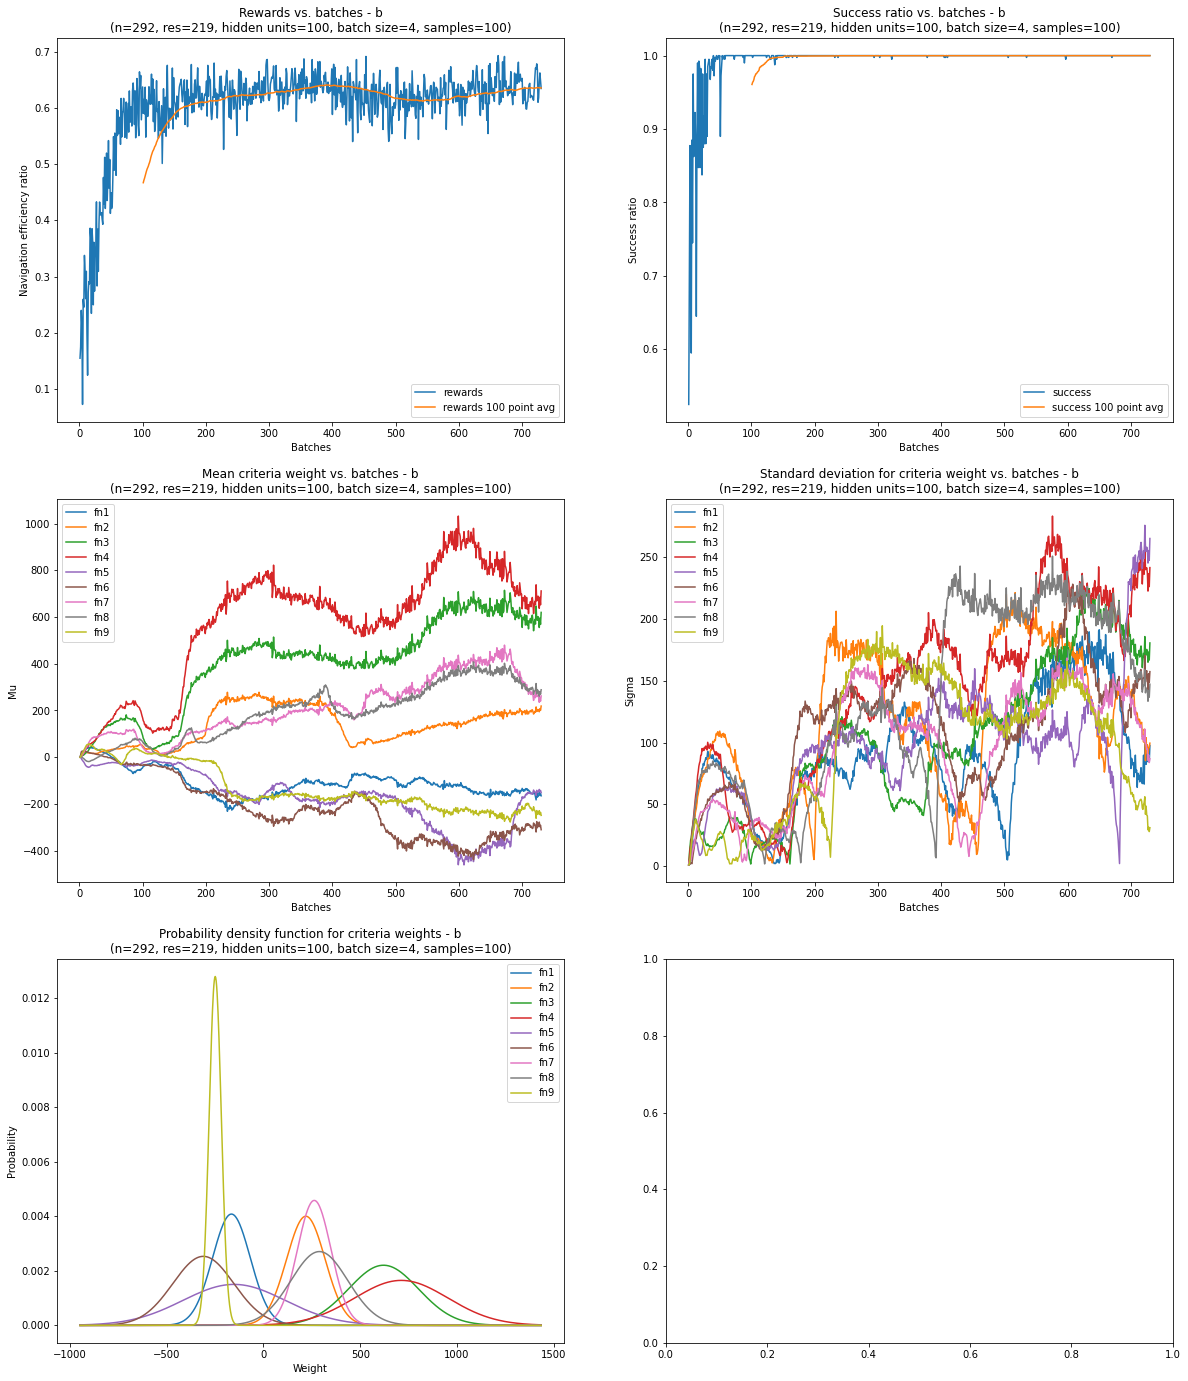

In [2]:
name = 'b'
res = 219
batch = 4
sample = 100
subj = 0
hu = 100
lr = 0.005
plt_avg = 100

fname = f'results/train/train_{name}/train_{name}_r{res}_su{subj}_b{batch}_sa{sample}_hu{hu}_lr{str(lr)[2:]}.pt'
plt_data = torch.load(fname, map_location=device)
num_fns = len(plt_data['mu'])
plt_subtitle = f' - {name}\n(n={len(plt_data["train_idx"])}, res={res}, hidden units={hu}, batch size={batch}, samples={"full" if sample == 0 else sample})'
plot(plt_data, num_fns, plt_avg=plt_avg, plt_subtitle=plt_subtitle)